In [1]:
import rebound
print(rebound.__build__)
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

Nov 20 2019 14:02:54


In [78]:
def setup():
    sim = rebound.Simulation()
    #sim.softening = 0.01
    sim.add(m=1)
    sim.add(m=1e-3,a=1)
    sim.add(m=1e-3,a=1.208,f=1.2443)
    sim.dt = sim.particles[1].P*0.012491045123123
    sim.move_to_com()
    return sim
def run(sim,times,record=True):
    E0 = sim.calculate_energy()
    if record:
        Es = np.zeros(Nsamples)
        for i, t in enumerate(times):
            sim.integrate(t,exact_finish_time=0)
            E1 = sim.calculate_energy()
            Es[i] = np.abs((E0-E1)/E0)
    else:
        sim.integrate(times[-1],exact_finish_time=0)
        E1 = sim.calculate_energy()
        Es = np.ones(Nsamples)*np.abs((E0-E1)/E0)
    return Es

In [81]:
setup().particles[1].P*0.012491045123123

6.280046068758708

In [3]:
Nsamples = 1000
times = np.linspace(0.,13.,Nsamples)

In [4]:
sim = setup()
sim.integrator = "whfast"
sim.ri_whfast.coordinates = "democraticheliocentric"
E_wh = run(sim,times)

In [5]:
sim = setup()
sim.integrator = "mercurius"
E_mercurius = run(sim,times)

In [6]:
sim = setup()
sim.integrator = "mercurana"
sim.ri_ias15.min_dt = 1e-5
sim.ri_mercurana.hillfac = 3
E_mercurana = run(sim,times)
#sim = setup()
#sim.integrator = "mercurana"
#sim.ri_ias15.min_dt = 1e-5
#E_mercurana_nostop = run(sim,times,record=False)

In [7]:
sim = setup()
sim.integrator = "leapfrog"
E_leapfrog = run(sim,times)

In [ ]:
sim = setup()
sim.integrator = "leapfrog"
sim.ri_whfast.kernel = "6aba363"
E_6aba363 = run(sim,times)

In [ ]:
Nsamplesias = Nsamples*10
timesias = np.linspace(0.,times[-1],Nsamplesias)
sim = setup()
xys = np.zeros((Nsamplesias,sim.N,2))
E_ias = np.zeros(Nsamplesias)
E0 = sim.calculate_energy()
for i, t in enumerate(timesias):
    sim.integrate(t,exact_finish_time=1)
    E1 = sim.calculate_energy()
    E_ias[i] = np.abs((E0-E1)/E0)
    for j,p in enumerate(sim.particles):
        xys[i,j] = (p.x,p.y)

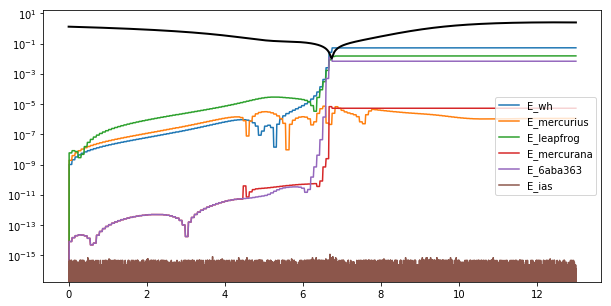

In [82]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_yscale("log")
ax.plot(times,E_wh,label="E_wh")
ax.plot(times,E_mercurius,label="E_mercurius")
ax.plot(times,E_leapfrog,label="E_leapfrog")
ax.plot(times,E_mercurana,label="E_mercurana")
#ax.plot(times,E_mercurana_nostop,label="E_mercurana_nostop")
ax.plot(times,E_6aba363,label="E_6aba363")
ax.plot(timesias,E_ias,label="E_ias")
ax.plot(timesias,np.sqrt((xys[:,1,0]-xys[:,2,0])**2+(xys[:,1,1]-xys[:,2,1])**2),color="black",lw=2) 
ax.legend();

In [11]:
phi = np.arctan2(xys[:,1,0],xys[:,1,1])
r = np.sqrt(np.square(xys[:,1,0])+np.square(xys[:,1,1]))

In [12]:
c, s = np.cos(phi), np.sin(phi)

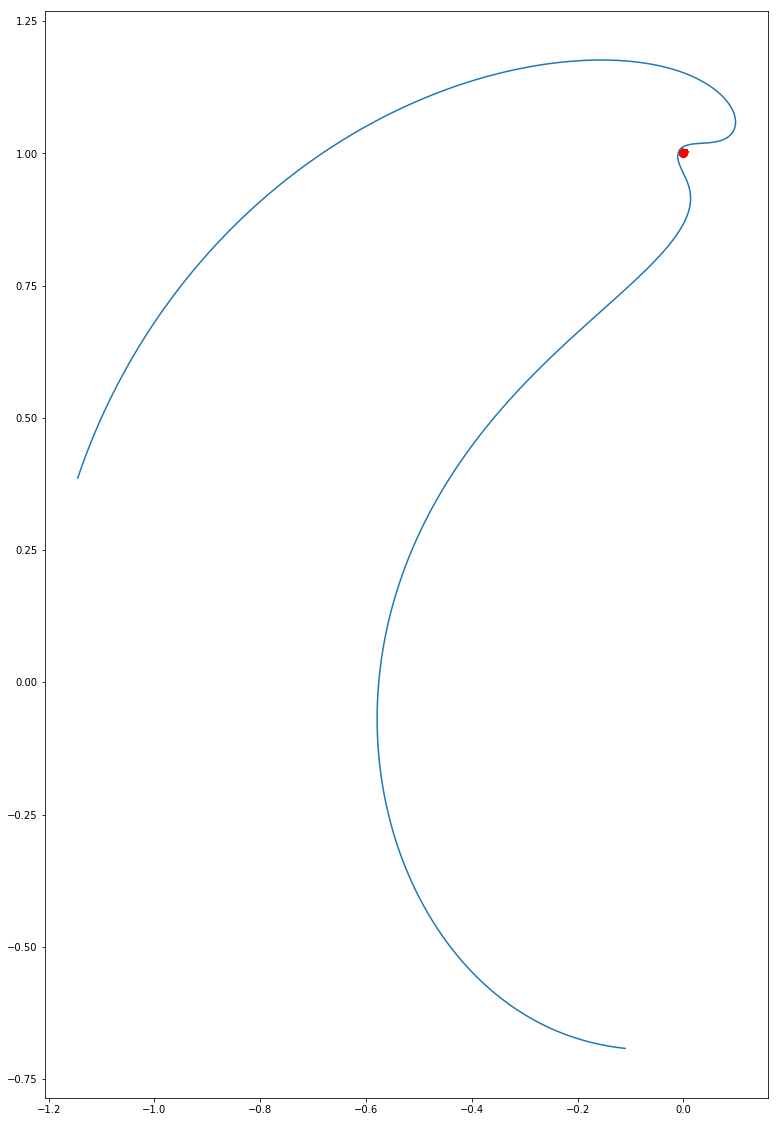

In [13]:
fig, ax = plt.subplots(1,1,figsize=(20,20))
ax.set_aspect("equal")
#ax.scatter(xys[:,:,0],xys[:,:,1]);
#ax.plot(xys[:,1,0]-xys[:,2,0],xys[:,1,1]-xys[:,2,1]);
ax.plot((c*xys[:,1,0]-s*xys[:,1,1])/r, (s*xys[:,1,0]+c*xys[:,1,1])/r,color="red",lw=9)
ax.plot((c*xys[:,2,0]-s*xys[:,2,1])/r, (s*xys[:,2,0]+c*xys[:,2,1])/r)